## Calculating period-2 orbit

Coefficients of the linear fit: [0.2889171 0.3333284]


Text(0.05, 0.95, '$y = 2.89e-01 \\varepsilon + 3.33e-01$')

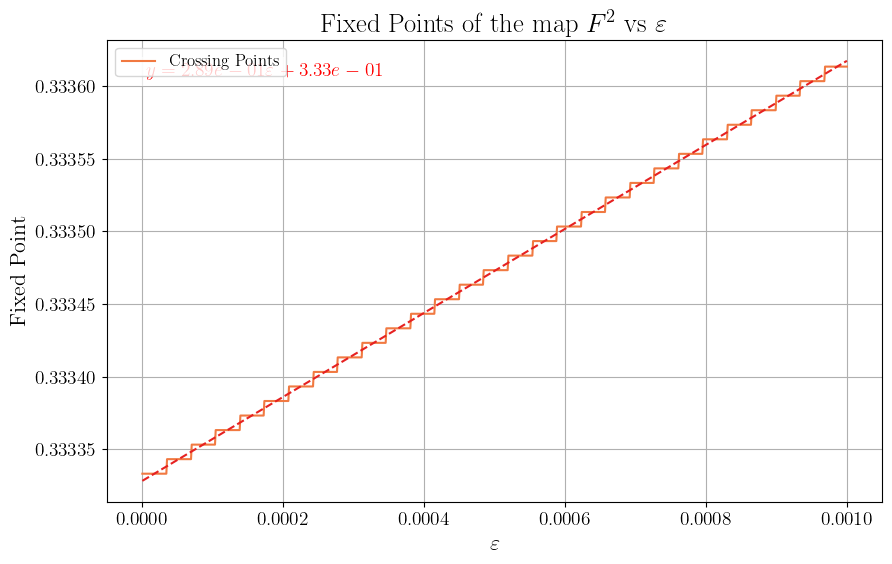

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)

def F(x, epsilon):
    return (2*x + epsilon*np.sin(4*np.pi*x)) % 1


epsilon_values = np.linspace(1e-7, 1e-3, 1000)  # Adjusted epsilon values
crossing_points = []
for epsilon in epsilon_values:
    x = np.linspace(0, 1, 100000)
    y = F(F(x, epsilon), epsilon)

    # calculate the crossing points
    crossings = np.where(np.diff(np.sign(y - x)))
    crossing_points.append(x[crossings][2])
    
plt.figure(figsize=(10, 6))
plt.title(r'Fixed Points of the map $F^2$ vs $\varepsilon$')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'Fixed Point')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(epsilon_values, crossing_points, color="#F17941")

coeffs = np.polyfit(epsilon_values, crossing_points, 1)
print("Coefficients of the linear fit:", coeffs)
func = np.poly1d(coeffs)
# disply the equation of the fitted line. Use another method to show the text, it returns an error if I use the previous method
plt.legend(['Crossing Points', 'Fitted Line'], fontsize=12)
plt.plot(epsilon_values, func(epsilon_values), color="#E62121", linestyle='--', label='Fitted Line')

# Show the equation of the fitted line using axes coordinates (ax.annotate)
ax = plt.gca()
eqn = r'$y = {:.2e} \varepsilon + {:.2e}$'.format(coeffs[0], coeffs[1])
ax.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=14, color='red', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

C:\Users\TLP-001\AppData\Local\Temp\ipykernel_81888\61363774.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('plasma', 1000)  # Use a colormap with 1000 colors


[0, 249, 366, 499, 632, 749]
[0.36636637 0.63263263]


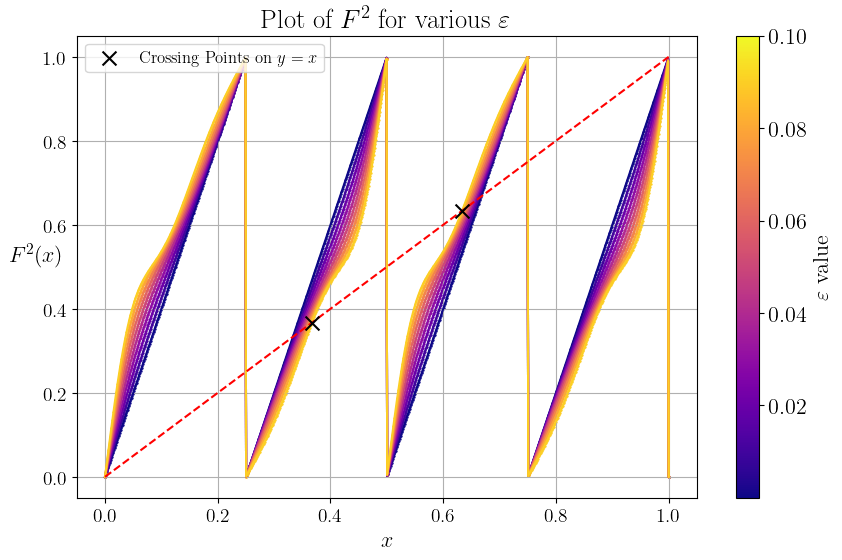

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# configure a matplotlib figure
plt.figure(figsize=(10, 6))
plt.title(r'Plot of $F^2$ for various $\varepsilon$')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
# make the names of the axes horizontal, I meant $x$ and $F^2(x)$
plt.xlabel(r'$x$', fontsize=16, rotation=0)
plt.ylabel(r'$F^2(x)$', fontsize=16, rotation=0)

x = np.linspace(0, 1, 1000)
# for each epsilon, calculate F(F(x, epsilon), epsilon) and plot it with a color gradient
cm = plt.cm.get_cmap('plasma', 1000)  # Use a colormap with 1000 colors
epsilon_values = np.linspace(1e-7, 1e-1, 10)  # Adjusted epsilon values
scatters = []
for i, eps in enumerate(epsilon_values):
    y = F(F(x, eps), eps)
    icolor = int(i / len(epsilon_values) * cm.N)
    icolor = min(icolor, cm.N - 1)
    sc = plt.scatter(x, y, color=cm(icolor), s=0.5)
    plt.plot(x, y, color=cm(icolor))
    scatters.append(sc)
plt.plot(x, x, color='red', linestyle='--')

# Add a colorbar after plotting, using a ScalarMappable
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=epsilon_values.min(), vmax=epsilon_values.max())
sm = mpl.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
plt.colorbar(sm, label=r'$\varepsilon$ value', ax=plt.gca())

# calculate the crossing points
crossings = list(np.where(np.diff(np.sign(y - x)))[0])
print(crossings)
crossings = [crossings[i] for i in [2, 4]]
crossing_points = x[crossings]
print(crossing_points)
plt.scatter(crossing_points, crossing_points, color='black', marker='x', s=100, zorder=5, label='Crossing Points on $y=x$')
plt.legend(loc='upper left', fontsize=12)
plt.show()
    


## Numeric Validation - Lyapunov Exponent

Coefficients of the linear fit: [-0.00772491  0.69314718]


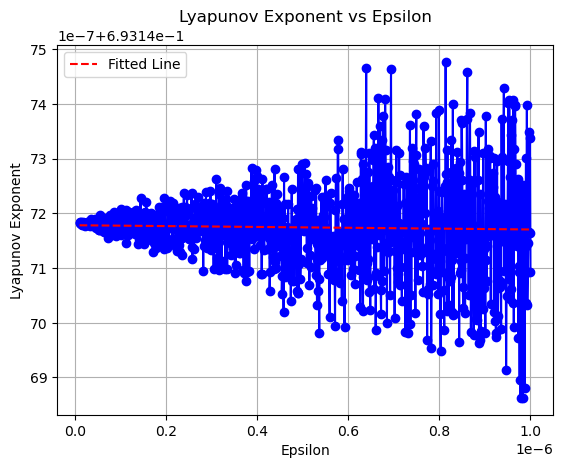

In [ ]:
# solve linear system in tangent space using Jacobian
y0 = 1.43/4

def jacobian(x, epsilon):
    return 2 + 4*np.pi*epsilon*np.cos(4*np.pi*x)

def calc_lyapunov_exponent(epsilon, y0, T=1000):
    sum = 0
    y = y0
    for t in range(T):
        sum += np.log(jacobian(y, epsilon))
        y = F(y, epsilon)
    return sum / T

epsilon_values = np.linspace(1e-8, 1e-6, 1000)  # Adjusted epsilon values
lyapunov_exponents = []
for epsilon in epsilon_values:
    lyapunov_exponents.append(calc_lyapunov_exponent(epsilon, y0, T=1000))
coeffs = np.polyfit(epsilon_values, lyapunov_exponents, 1)
print("Coefficients of the linear fit:", coeffs)
plt.plot(epsilon_values, lyapunov_exponents, marker='o', linestyle='-', color='blue')
plt.plot(epsilon_values, np.polyval(coeffs, epsilon_values), color='red', linestyle='--', label='Fitted Line')
plt.legend()
plt.xlabel('Epsilon')
plt.ylabel('Lyapunov Exponent')
plt.title('Lyapunov Exponent vs Epsilon')
plt.grid()
plt.show()


Coefficients of the linear fit (rho): [-0.00989863  0.69314883]


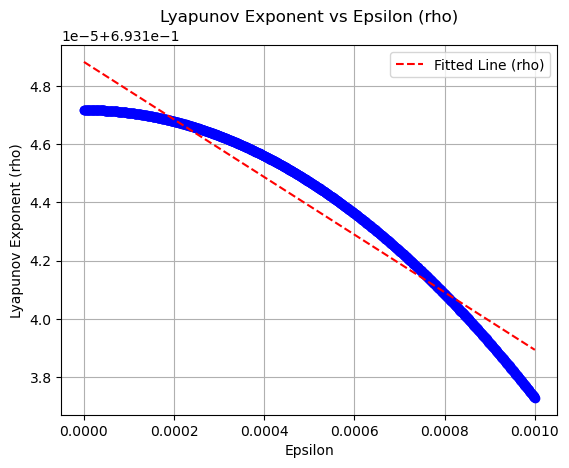

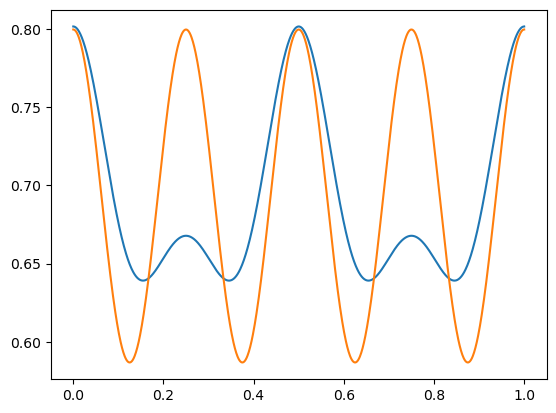

In [ ]:
def rho(x, epsilon):
    return 1 + epsilon * 2*np.pi * np.cos(8*np.pi*x)

def integrand(x, epsilon):
    return np.log(jacobian(x, epsilon)) * rho(x,epsilon)

def approx_integrand(x, epsilon):
    return np.log(2) + (2 + 2* np.log(2))*np.pi*epsilon*np.cos(8*np.pi*x)

# Calculate the Lyapunov exponent using the rho function
def calc_lyapunov_exponent_rho(epsilon):
    # integrate over log(Jacobian(x))*rho(x) in [0, 1]
    # use scipy integrate.quad
    from scipy.integrate import quad
    integral, _ = quad(integrand, 0, 1, epsabs=1e-10, epsrel=1e-10, args=(epsilon,))
    return integral

lyapunov_exponents_rho = []
epsilon_values = np.linspace(1e-7, 0.001, 1000)  # Adjusted epsilon values
for epsilon in epsilon_values:
    lyapunov_exponents_rho.append(calc_lyapunov_exponent_rho(epsilon))
coeffs_rho = np.polyfit(epsilon_values, lyapunov_exponents_rho, 1)
print("Coefficients of the linear fit (rho):", coeffs_rho)
plt.plot(epsilon_values, lyapunov_exponents_rho, marker='o', linestyle='-', color='blue')
plt.plot(epsilon_values, np.polyval(coeffs_rho, epsilon_values), color='red', linestyle='--', label='Fitted Line (rho)')
plt.legend()
plt.xlabel('Epsilon')
plt.ylabel('Lyapunov Exponent (rho)')
plt.title('Lyapunov Exponent vs Epsilon (rho)')
plt.grid()
plt.show()

epsilon = 1e-2
x = np.linspace(0, 1, 1000)
inegrand_arr = integrand(x, epsilon)
approx_integrand_arr = approx_integrand(x, epsilon)
plt.plot(x, inegrand_arr, label="integrand")
plt.plot(x, approx_integrand_arr, label="approx")
plt.show()

## Calculating the Physical Measure numerically

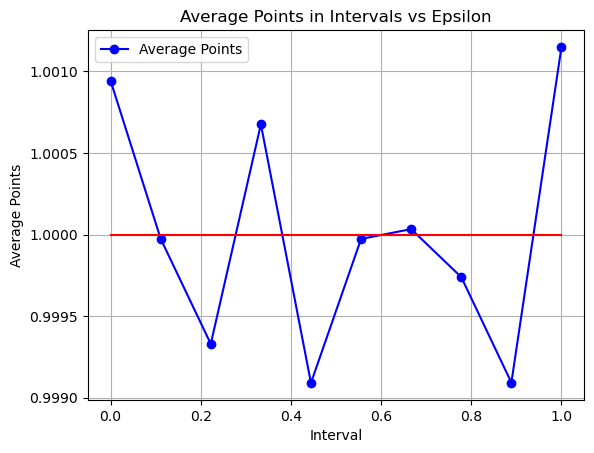

In [ ]:
# start from a certain point in [0,1]
# and calculate a 1e5 long trajectory of the map.
# divide [0,1] into 1000 intervals and calculate the average amount of points
# in the trajectory that fall into each interval
x0 = np.sqrt(2)/2  # starting point in [0,1]
def calculate_average_points_in_intervals(epsilon, num_intervals=100, trajectory_length=10000000):
    x = x0
    trajectory = []
    for _ in range(trajectory_length):
        trajectory.append(x)
        x = F(x, epsilon) + np.random.uniform(-1e-6, 1e-6)  # add small noise to avoid periodicity
    intervals = np.linspace(0, 1, num_intervals + 1)
    counts = np.histogram(trajectory, bins=intervals)[0]
    average_counts = counts / trajectory_length * num_intervals
    return average_counts

average_points = []
# for epsilon in epsilon_values:
#     average_counts = calculate_average_points_in_intervals(epsilon)
#     average_points.append(average_counts)

epsilon = 10-3
num_intervals = 10
x = np.linspace(0, 1, num_intervals)
average_counts = calculate_average_points_in_intervals(epsilon, num_intervals=num_intervals)
plt.plot(x, average_counts, marker='o', linestyle='-', color='blue', label='Average Points')
plt.title('Average Points in Intervals vs Epsilon')
plt.xlabel('Interval')
plt.ylabel('Average Points')
plt.legend()
plt.grid()


x = np.linspace(0, 1, 1000)
def measure(x):
    return 1 - 2* np.pi*epsilon*np.cos(8 * np.pi*x)
plt.plot(x, measure(x), label='Measure', color='red')
plt.show()

## Simulate evolution of given distribution

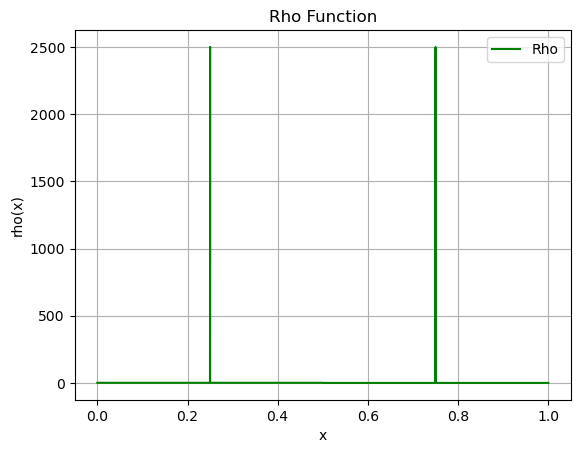

In [ ]:
alpha = 0.5

def delta(x, x0, width=1e-4):
    return np.where(np.abs(x - x0) < width, 1, 0) * 1 / width

def rect(x):
    return np.where((x >= 0) & (x < 0.5), 2*alpha, 0)

def rho(x, y0, y1):
    return 1/2 * (1 - alpha) * (delta(x, y0) + delta(x, y1)) + rect(x)

def L0(x, y0, y1):
    return 1/2 * (rho ())

x = np.linspace(0, 1, 100000)
plt.plot(x, rho(x, 0.25, 0.75), label='Rho', color='green')
plt.title('Rho Function')
plt.xlabel('x')
plt.ylabel('rho(x)')
plt.legend()
plt.grid()
plt.show()